# שיעור 2 — מחברת למידה עם הסברים מלאים (עברית)
מחברת זו בנויה ללמידה עצמית: לכל נושא יש **הסבר תיאורטי קצר**, **נוסחאות**, ואז **תאי קוד** שממחישים את הרעיונות מתוך המצגת.

**תלויות:** `numpy`, `matplotlib` (אין שימוש ב-seaborn).

**טיפ:** אחרי כל תא הרצה, עצרו והסבירו לעצמכם במילים מה קיבלתם—זה משפר הבנה בצורה משמעותית!

In [1]:
# התקנות נדרשות (אם צריך בסביבה המקומית): pip install numpy matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(42)


## 🎯 תוחלת, שונות וסטיית תקן — תיאוריה קצרה
**תוחלת**: הערך הממוצע הצפוי של משתנה מקרי בדיד  
\(E[X] = \sum_x x\,p(x)\)

**שונות**: כמה ערכים נוטים להתרחק מהממוצע  
\(Var(X) = E[X^2] - (E[X])^2\)  
**סטיית תקן**: \(\sigma=\sqrt{Var(X)}\)

**לינאריות התוחלת**: \(E[aX+b] = aE[X] + b\)  (חשוב! אין צורך בעצמאות לביטוי זה)

In [2]:
# דוגמה קטנה: חישוב תוחלת ושונות מתוך PMF נתון ידנית
x = np.array([0,1,2,3])
p = np.array([0.1,0.2,0.5,0.2])  # חייב לסכם ל-1
assert abs(p.sum()-1) < 1e-9

E = (x*p).sum()
E2 = ((x**2)*p).sum()
Var = E2 - E**2
print(f"E={E:.3f}, Var={Var:.3f}, Sigma={np.sqrt(Var):.3f}")

E=1.800, Var=0.760, Sigma=0.872


## 🎲 סכום שתי קוביות — מהמצגת (שקפים 5–6)
**מטרה:** לבנות PMF של סכום שתי קוביות הוגנות, ולחשב תוחלת/שונות.  
**רציונל:** מרחב הדגימה כולל 36 תוצאות equiprobable. הסכום נע בין 2 ל-12, עם צפיפויות שונות.

**מה נלמד:**
- לבנות התפלגות מדידה "מאפס" ולחשב גדלים תיאורטיים
- לראות חזותית את PMF


ערכים: [ 2  3  4  5  6  7  8  9 10 11 12]
PMF: [0.0278 0.0556 0.0833 0.1111 0.1389 0.1667 0.1389 0.1111 0.0833 0.0556
 0.0278]
E=7.0000, Var=5.8333


/var/folders/43/1l45prm93sv8291fw3nc2wkm0000gn/T/ipykernel_52759/1028734857.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(s_vals, pmf, use_line_collection=True)


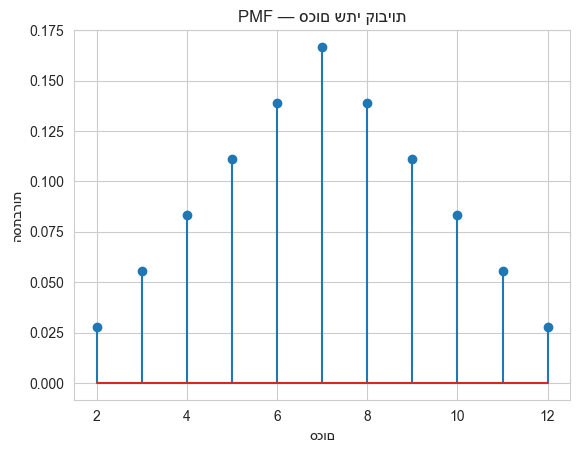

In [3]:
sums = [i+j for i in range(1,7) for j in range(1,7)]
s_vals, counts = np.unique(sums, return_counts=True)
pmf = counts / counts.sum()
E = (s_vals*pmf).sum()
Var = ((s_vals**2)*pmf).sum() - E**2

print("ערכים:", s_vals)
print("PMF:", pmf.round(4))
print(f"E={E:.4f}, Var={Var:.4f}")

plt.figure()
plt.stem(s_vals, pmf, use_line_collection=True)
plt.title("PMF — סכום שתי קוביות")
plt.xlabel("סכום")
plt.ylabel("הסתברות")
plt.show()

## 🔗 עצמאות סטטיסטית — דוגמת קוביות (שקף 10)
**הגדרה:** אירועים A ו-B עצמאיים אם \(P(A\cap B)=P(A)P(B)\).  
**בדוגמה:** \(G\in\{3,6\}\) ו-\(R=5\) — בדקו שמתקיים שוויון המכפלות.

In [4]:
outcomes = [(r,g) for r in range(1,7) for g in range(1,7)]
p = 1/36
P_joint = sum(1 for r,g in outcomes if g in {3,6} and r==5) * p
P_G = sum(1 for r,g in outcomes if g in {3,6}) * p
P_R = sum(1 for r,g in outcomes if r==5) * p
print("P(G∈{3,6} and R=5) =", P_joint)
print("P(G∈{3,6}) * P(R=5) =", P_G*P_R)

P(G∈{3,6} and R=5) = 0.05555555555555555
P(G∈{3,6}) * P(R=5) = 0.05555555555555555


## 🧮 ברנולי ובינומיאלית (שקפים 8, 18–20)
**ברנולי(p):** \(P(X=1)=p, P(X=0)=1-p\), \(E[X]=p\), \(Var(X)=p(1-p)\).  
**בינומיאלית(n,p):** \(X\sim Binom(n,p)\) — סכום של n ברנוליים עצמאיים.

**תיאוריה:** \(P(X=k)=\binom{n}{k}p^k(1-p)^{n-k}\), \(E[X]=np\), \(Var(X)=np(1-p)\).
**בדיקה אמפירית:** נשווה בין תיאוריה לסימולציה.

In [5]:
n, p = 20, 0.3
theo_E, theo_V = n*p, n*p*(1-p)
samp = np.random.binomial(n, p, size=100000)
print("תיאורטי: E,Var =", theo_E, theo_V)
print("סימולציה: E,Var =", samp.mean(), samp.var(ddof=0))

תיאורטי: E,Var = 6.0 4.199999999999999
סימולציה: E,Var = 5.99552 4.1768599296


## 🎯 גיאומטרית — זמן עד הצלחה ראשונה (שקפים 21–22)
**הגדרה:** מספר הניסיונות עד הצלחה ראשונה.  
**תיאוריה:** \(E[X]=1/p\), \(Var(X)=(1-p)/p^2\).

In [6]:
p = 0.25
samp = np.random.geometric(p, size=50000)  # 1,2,3, ...
print("תיאורטי: E,Var =", 1/p, (1-p)/p**2)
print("סימולציה: E,Var =", samp.mean(), samp.var(ddof=0))

תיאורטי: E,Var = 4.0 12.0
סימולציה: E,Var = 4.02052 12.1016589296


## 🏀 נג-בינומיאלי — "Randomistan" (שקפים 23–31)
**רעיון:** כמה ניסיונות עד שנצבור \(r\) הצלחות בהסתברות הצלחה \(p\).  
Player 1: \(X_1\sim NegBin(r,p)\) ; Player 2: \(X_2\sim NegBin(mr, mp)\).  
**תוצאה חשובה:** \(E[X_1]=E[X_2]=r/p\). נשווה שונות ונאמוד \(P(X_1>X_2)\).

In [7]:
def negbin_trials(r, p, size):
    out=[]
    for _ in range(size):
        s=0; t=0
        while s<r:
            t+=1
            if np.random.rand()<p:
                s+=1
        out.append(t)
    return np.array(out)

r,p,m = 5, 0.4, 2
N=80000
X1 = negbin_trials(r,p,N)
X2 = negbin_trials(m*r, m*p, N)
print("E תיאורטי:", r/p, (m*r)/(m*p))
print("E סימולציה:", X1.mean(), X2.mean())
print("Var סימולציה:", X1.var(ddof=0), X2.var(ddof=0))
print("P(X1>X2)≈", (X1>X2).mean())

E תיאורטי: 12.5 12.5
E סימולציה: 12.501675 12.4937375
Var סימולציה: 18.734372194375 3.1170107810937497
P(X1>X2)≈ 0.4096


## ⏱️ פואסון(λ) — ביקורים באתר (שקפים 36–38)
**הגדרה:** \(X\sim Pois(\lambda)\).  
**דוגמה:** \(\lambda=0.5\) ביקורים לשנייה. מה \(P(X=0)\) בשנייה אחת וב-10 שניות?

In [8]:
lam=0.5
p0_1 = math.exp(-lam)
p0_10_via_single = math.exp(-10*lam)   # כמו Pois(5)
p0_10_via_indep  = (math.exp(-lam))**10
print("P(X=0) בשנייה:", p0_1)
print("P(0 ביקורים ב-10 שניות) (Pois(5)):", p0_10_via_single)
print("דרך עצמאות 10 שניות:", p0_10_via_indep)

P(X=0) בשנייה: 0.6065306597126334
P(0 ביקורים ב-10 שניות) (Pois(5)): 0.006737946999085467
דרך עצמאות 10 שניות: 0.006737946999085467


## 📈 גבול Binomial → Poisson (שקפים 33–35)
**רעיון:** אם \(n\to\infty\) ו-\(p=\lambda/n\) כך ש-\(np=\lambda\) קבוע, אז \(Binom(n,p)\) מתכנס ל-\(Pois(\lambda)\).  
נראה גרפית את ההתקרבות.

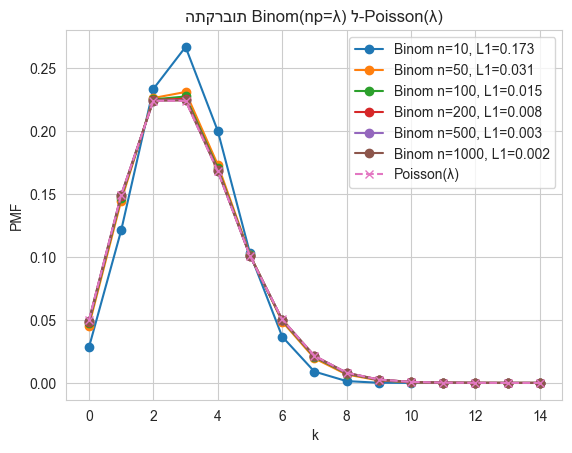

In [9]:
lam = 3.0
ks = np.arange(0,15)
plt.figure()
def poisson_pmf(k, lam): return math.exp(-lam)*(lam**k)/math.factorial(k)
for n in [10,50,100,200,500,1000]:
    p = lam/n
    # PMF בינומיאלי ידני
    from math import comb
    pmf_bin = np.array([comb(n,k)*(p**k)*((1-p)**(n-k)) for k in ks])
    pmf_poi = np.array([poisson_pmf(k,lam) for k in ks])
    L1 = np.abs(pmf_bin-pmf_poi).sum()
    plt.plot(ks, pmf_bin, marker="o", label=f"Binom n={n}, L1={L1:.3f}")
plt.plot(ks, [poisson_pmf(k,lam) for k in ks], marker="x", linestyle="--", label="Poisson(λ)")
plt.title("התקרבות Binom(np=λ) ל-Poisson(λ)")
plt.xlabel("k"); plt.ylabel("PMF"); plt.legend(); plt.show()

## ➕ סכום שני פואסונים — גם פואסון (שקף 40)
אם \(X\sim Pois(\lambda_1)\), \(Y\sim Pois(\lambda_2)\) בלתי תלויים — אז \(X+Y\sim Pois(\lambda_1+\lambda_2)\).  נבדוק אמפירית.

תיאורטי E=Var: 4.0
סימולציה E,Var: 4.002633333333334 4.027726398888889


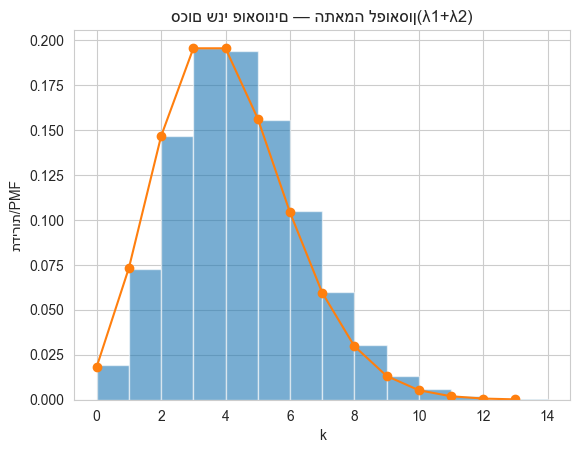

In [10]:
def pois_pmf(k, lam): return math.exp(-lam)*(lam**k)/math.factorial(k)

lam1, lam2 = 1.2, 2.8
N=60000
X = np.random.poisson(lam1, size=N)
Y = np.random.poisson(lam2, size=N)
Z = X+Y
emp_E, emp_V = Z.mean(), Z.var(ddof=0)
theo = lam1+lam2
print("תיאורטי E=Var:", theo)
print("סימולציה E,Var:", emp_E, emp_V)

k = np.arange(0, Z.max()+1)
pmf_theo = np.array([pois_pmf(int(kk), theo) for kk in k])
plt.figure()
plt.hist(Z, bins=range(0,int(Z.max())+2), density=True, alpha=0.6)
plt.plot(k, pmf_theo, marker="o")
plt.title("סכום שני פואסונים — התאמה לפואסון(λ1+λ2)")
plt.xlabel("k"); plt.ylabel("תדירות/PMF")
plt.show()

## 📐 קו-וריאנס ושונות של סכום
\(Cov(X,Y)=E[XY]-E[X]E[Y]\). אם X,Y עצמאיים → \(Cov=0\).
\(Var(X+Y)=Var(X)+Var(Y)+2Cov(X,Y)\).  
**תרגיל קטן:** שחקו עם מתאמים שונים וראו את האפקט על שונות הסכום.

In [11]:
# סימולציה: שונות סכום תחת מתאם שונה (קורלציה חיובית/שלילית/אפס)
N=20000
# נבנה זוגות עם קורלציה רצויה באופן גס (דרך שילוב):
U = np.random.normal(0,1,N)
V = np.random.normal(0,1,N)
X = U
rho = 0.7
Y_pos = rho*U + math.sqrt(1-rho**2)*V  # בקירוב מתאם ~rho
rho = 0.0
Y_zero = rho*U + math.sqrt(1-rho**2)*V
rho = -0.7
Y_neg = rho*U + math.sqrt(1-rho**2)*V

for name, Y in [("קורלציה חיובית ~0.7", Y_pos),
                ("קורלציה 0", Y_zero),
                ("קורלציה שלילית ~-0.7", Y_neg)]:
    var_sum = np.var(X+Y)
    cov = np.cov(X,Y, ddof=0)[0,1]
    print(f"{name}: Var(X+Y)≈{var_sum:.3f}, Cov≈{cov:.3f}")

קורלציה חיובית ~0.7: Var(X+Y)≈3.423, Cov≈0.704
קורלציה 0: Var(X+Y)≈2.009, Cov≈-0.005
קורלציה שלילית ~-0.7: Var(X+Y)≈0.603, Cov≈-0.712


## 📊 Binomial rate vs n (שקף 32)
משווים \(X_1\sim Binom(1,\lambda)\) מול \(X_2\sim Binom(2,\lambda/2)\).  
בדקו: \(P(X\ge 1)\) ו-\(E[X]\) — מי גבוה יותר?

In [12]:
lam=0.4
p1, p2 = lam, lam/2
P1 = 1-(1-p1)**1
P2 = 1-(1-p2)**2
E1, E2 = 1*p1, 2*p2
print("P(X1≥1), P(X2≥1) =", P1, P2)
print("E[X1], E[X2] =", E1, E2)

P(X1≥1), P(X2≥1) = 0.4 0.3599999999999999
E[X1], E[X2] = 0.4 0.4


## 📐 רגע שלישי מרכזי (Skewness-related) — בינומיאלי (שקפים 45–47)
עבור \(X\sim Binom(n,p)\) מתקבל: \(\gamma_3 = np(1-p)(1-2p)\). נבדוק נומרית ע"י סכום PMF.

In [13]:
from math import comb
def third_central_moment_binom(n,p):
    ks = np.arange(0, n+1)
    pmf = np.array([comb(n,k)*(p**k)*((1-p)**(n-k)) for k in ks])
    mu = n*p
    return np.sum(((ks-mu)**3)*pmf)

for n,p in [(10,0.3),(20,0.4),(50,0.1)]:
    theo = n*p*(1-p)*(1-2*p)
    emp = third_central_moment_binom(n,p)
    print(f"n={n}, p={p}: תאורטי={theo:.6f}, חישוב ישיר={emp:.6f}")

n=10, p=0.3: תאורטי=0.840000, חישוב ישיר=0.840000
n=20, p=0.4: תאורטי=0.960000, חישוב ישיר=0.960000
n=50, p=0.1: תאורטי=3.600000, חישוב ישיר=3.600000
